# ÖDEV-2 
c02103

## Ön hazırlık dosyasında verilen kodlar:

In [1]:
x=[0, 1, -1, 0, 0]
y=[0]
for i in range(1, len(x)):
    y.append(-0.5*y[i-1] + x[i] + 2*x[i-1])
print(y)

[0, 1.0, 0.5, -2.25, 1.125]


In [2]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

x=np.array([0, 1, -1, 0, 0],dtype=float)
y=np.array([0, 0, 0, 0, 0],dtype=float)
for i in range(1, len(x)):
    y[i]=-0.5*y[i-1] + x[i] + 2*x[i-1]
print(y)

[ 0.     1.     0.5   -2.25   1.125]


[ 0.     1.     0.5   -2.25   1.125]


Text(0.5, 0, 'n')

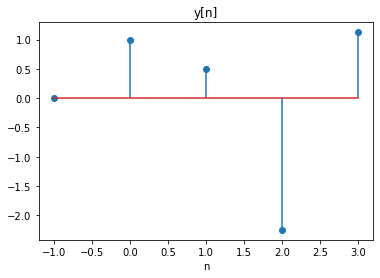

In [3]:
x=np.array([0, 1, -1, 0, 0],dtype=float)
b=[1, 2]
a=[1, 0.5]
y=signal.lfilter(b,a,x)
print(y)

n=np.arange(-1, 4)
plt.stem(n,y)
plt.title('y[n]')
plt.xlabel('n')

In [4]:
h=np.array([1, 2, -1], dtype=float)
x=np.array([1, 3], dtype=float)

M=len(h)
N=len(x)
L=M + N - 1
y=np.zeros([L])

for n in range(L):
    y[n]=0
    for k in range(N):
        if n-k<0 or n-k>=M:
            h_n_k=0
        else:
            h_n_k=h[n-k]
        y[n]=y[n] + x[k]*h_n_k

print(y)

[ 1.  5.  5. -3.]


In [5]:
h=np.array([1, 2, -1],dtype=float)
x=np.array([1, 3],dtype=float)
print(np.convolve(x,h))
print(signal.convolve(x,h))

[ 1.  5.  5. -3.]
[ 1.  5.  5. -3.]


[ 1  0  2 -1  3  0  6 -3]


Text(0.5, 1.0, 'y[n]')

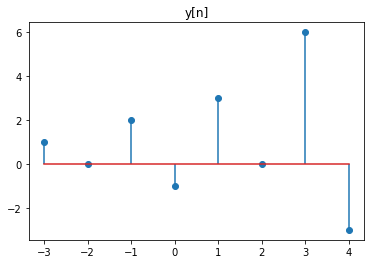

In [6]:
x=np.array([1, 0, 2, -1])
h=np.array([1, 0, 0, 0, 3])
y=np.convolve(x,h)
print(y)

n=np.arange(-3, 5)
plt.stem(n, y)
plt.title('y[n]')

## Ödev soruları:

### SORU-1
**a)** Dürtü cevabının bulunabilmesi için `y[n]/x[n]`(transfer fonksiyonu) in dürtü fonksiyonuyla konvolüsyonu alınması gerekmektedir. Ama bizim fonksiyonumuzda x yerine delta dirac fonksiyonu yazarsak y nin direkt olarak transfer fonksiyonuna eşit olduğunu görürüz. Ve x yerine dirac yazılmış halin de aslen dürtü yanıtı olduğunu görürüz. Ve bu transfer fonksiyonu,  

<div align="center">y[n] = d[n] - d[n-1]</div>

şeklinde bulunur.



**b)** Sistem n=1 den sonsuza kadar 0 değerini aldığından dolayı kararlıdır

c)

<function matplotlib.pyplot.show(close=None, block=None)>

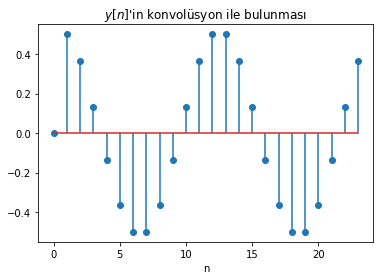

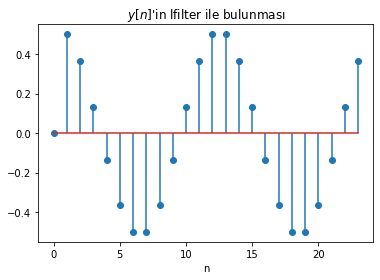

In [7]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

n = np.arange(0,24)
x_1 = np.sin((np.pi/6)*n)
h_1 = np.zeros(24)
h_1[:2] = [1, -1]

xh_1 = signal.convolve(x_1, h_1)
plt.stem(n, xh_1[:24])
plt.xlabel('n')
plt.title('$y[n]$\'in konvolüsyon ile bulunması')
plt.figure()

a_1 = [1]
b_1 = [1, -1]
y_1 = signal.lfilter(b_1, a_1, x_1)
plt.stem(n, y_1)
plt.xlabel('n')
plt.title('$y[n]$\'in lfilter ile bulunması')
plt.show

### SORU-2
**a)**

<Figure size 432x288 with 0 Axes>

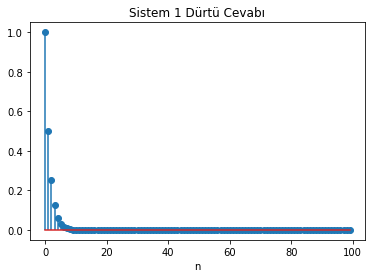

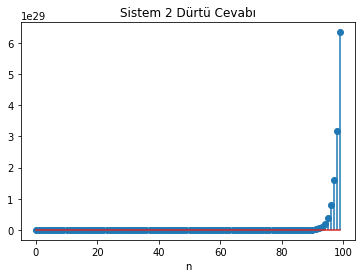

<Figure size 432x288 with 0 Axes>

In [8]:
n = np.arange(0, 100, 1)
x_i = np.zeros(100) # 0 dan 99 a kadar bir işaret
x_i[0] = 1

ay_1 = [1, -1/2]
by_1 = [1]
y_1 = signal.lfilter(by_1, ay_1, x_i)
plt.stem(n, y_1)
plt.xlabel('n')
plt.title("Sistem 1 Dürtü Cevabı")
plt.figure()

ay_2 = [1, -2]
by_2 = [1]
y_2 = signal.lfilter(by_2, ay_2, x_i)
plt.stem(n, y_2)
plt.xlabel('n')
plt.title("Sistem 2 Dürtü Cevabı")
plt.figure()

**b)** Sistemleri sonsuza yaklaşırken değerlerini gözlemleyebildiğimiz için kararlılıkları hakkında yorumda **bulunabiliriz**.  
İlk sistem kararlı, ikinci sistem kararsızdır.

**c)** Grafiklerde 0 öncesini göremediğimiz için bu konu hakkında bir yorum **yapılamaz**

### SORU-3


<Figure size 432x288 with 0 Axes>

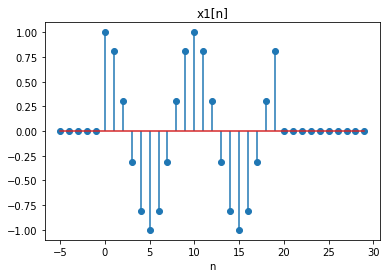

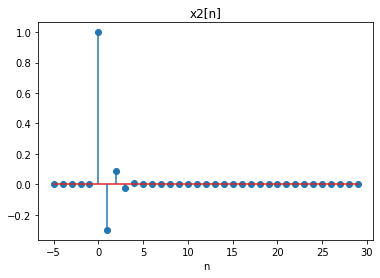

<Figure size 432x288 with 0 Axes>

In [9]:
#transfer fonksiyonları
h_1 = np.zeros(35)
h_2 = np.zeros(35)
h_1[4:7] = 1/3
h_2[5:9] = [1, 0, 0, -1]

n = np.arange(-5, 30, 1) # n, -5 ten 29 a kadar

# giriş işaretleinde kullanılmak için basamak fonksiyonları
u = np.heaviside(n, 1)
u_5 = np.heaviside(n-5, 1)
u_20 = np.heaviside(n-20, 1)

# giriş işaretleri
x_1 = np.cos(np.pi*n/5)*(u-u_20)
x_2 = (-0.3)**n*(u-u_5)

plt.stem(n, x_1[:35])
plt.xlabel('n')
plt.title("x1[n]")
plt.figure()

plt.stem(n, x_2[:35])
plt.xlabel('n')
plt.title("x2[n]")
plt.figure()

a)

<Figure size 432x288 with 0 Axes>

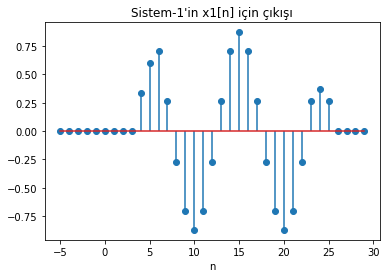

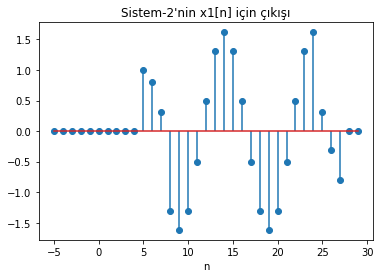

<Figure size 432x288 with 0 Axes>

In [10]:
# x1[n] için
xh_11 = signal.convolve(x_1, h_1)
plt.stem(n, xh_11[:35])
plt.xlabel('n')
plt.title("Sistem-1'in x1[n] için çıkışı")
plt.figure()

xh_12 = signal.convolve(x_1, h_2)
plt.stem(n, xh_12[:35])
plt.xlabel('n')
plt.title("Sistem-2'nin x1[n] için çıkışı")
plt.figure()


b)

<Figure size 432x288 with 0 Axes>

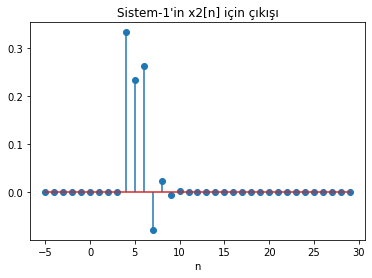

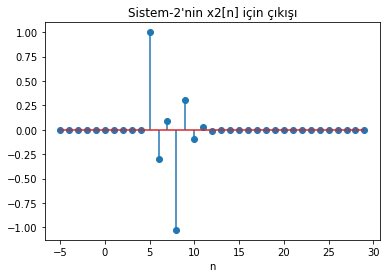

<Figure size 432x288 with 0 Axes>

In [11]:
# x2[n] için
xh_21 = signal.convolve(x_2, h_1)
plt.stem(n, xh_21[:35])
plt.xlabel('n')
plt.title("Sistem-1'in x2[n] için çıkışı")
plt.figure()

xh_22 = signal.convolve(x_2, h_2)
plt.stem(n, xh_22[:35])
plt.xlabel('n')
plt.title("Sistem-2'nin x2[n] için çıkışı")
plt.figure()